# Batched Bandit Problems


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from functools import partial


In [2]:
from batched_bandits.agents import (
    BatchedBernoulliThompsonAgent,
    BatchedEpsGreedyAgent,
    ABAgent,
    BaSEAgent,
)
from batched_bandits.experiment import BatchNumberExperiment, ArmNumberExperiment

from batched_bandits.util import (
    make_arithmetic_grid,
    make_geometric_grid,
    make_minimax_grid,
    plot_regret,
)

### Defining an Arm

Depending on the agent you use you can define the Arm to have any distribution. The Arm must have a mean and method sample that returns a single value reward as float or int.


In [3]:
class Arm:
    def __init__(self, mean):
        self.mean = mean

    def sample(self):
        # return np.random.normal(self.mean, 1)
        return np.random.binomial(1, self.mean)

## Experiments


### Experiment parameters

These are the main parameters to alter the experiment. These are my reccomendations if you're playing around

- Define your arms and then experiment for values of T and M
  - T does hit a point of diminishing returns based on your arms
  - M does not hit a point of diminishing returns, but is restricted by time line
- Experiment with different distributions for rewards
  - Eps-Greedy, BaSE, and AB are all capable of any reward function
  - Thompson Sampling would need to be rewritten to correpsond to the correct posterior solution


In [4]:
NUM_SIMS = 100
M = 6
T = 5000
GAMMA = 0.5
EPSILON = 0.9
BATCH_SIZES_TEST = [2, 4, 6, 8]
STATIC_ARM_DICT = {i: Arm(i) for i in (0.5, 0.51, 0.6)}
ARM_MEAN_TEST = (0.6, 0.5, 0.51, 0.49, 0.48, 0.52)


### Batch Number Experiment


In [5]:
test_batch_config = {
    "arm_dict": STATIC_ARM_DICT,
    "num_sims": NUM_SIMS,
    "agents_kwargs": {
        "TS": {},
        "AB": {},
        "eps_greedy": {"epsilon": 0.9},
        "BaSE": {"gamma": GAMMA},
    },
    "agent_dict": {
        "TS": partial(BatchedBernoulliThompsonAgent),
        "AB": partial(ABAgent),
        "eps_greedy": partial(BatchedEpsGreedyAgent),
        "BaSE": partial(BaSEAgent),
    },
    "grid_dict": {
        "minimax": partial(make_minimax_grid),
        "geometric": partial(make_geometric_grid),
        "arithmetic": partial(make_arithmetic_grid),
    },
}

In [6]:
batch_exp = BatchNumberExperiment(
    m_list=BATCH_SIZES_TEST, T=T, config=test_batch_config
)


In [7]:
batch_exp.run()

/home/sean/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sean/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sean/Documents/batched_bandits/batched_bandits/agents.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  self.gamma * np.log(self.T * self.K) / len(self.reward_dict[arm])


In [8]:
batch_exp.save_experiment("batch_exp")

## Arm Number Experiment


In [9]:
test_arms_config = {
    "num_sims": NUM_SIMS,
    "agents_kwargs": {
        "TS": {},
        "AB": {},
        "eps_greedy": {"epsilon": 0.9},
        "BaSE": {"gamma": GAMMA},
    },
    "agent_dict": {
        "TS": partial(BatchedBernoulliThompsonAgent),
        "AB": partial(ABAgent),
        "eps_greedy": partial(BatchedEpsGreedyAgent),
        "BaSE": partial(BaSEAgent),
    },
    "grid_dict": {
        "minimax": make_minimax_grid(T, M),
        "geometric": make_geometric_grid(T, M),
        "arithmetic": make_arithmetic_grid(T, M),
    },
    "arm_constructor": partial(Arm),
}

In [10]:
arm_exp = ArmNumberExperiment(
    T=T, M=M, arm_means=ARM_MEAN_TEST, config=test_arms_config
)

In [11]:
arm_exp.run()

In [12]:
arm_exp.save_experiment("arm_exp")

## Figures


In [13]:
sns.set(rc={'figure.figsize':(12, 12)})

df = pd.read_csv("batch_exp.csv").drop("Unnamed: 0", axis=1)

#### TS Agent


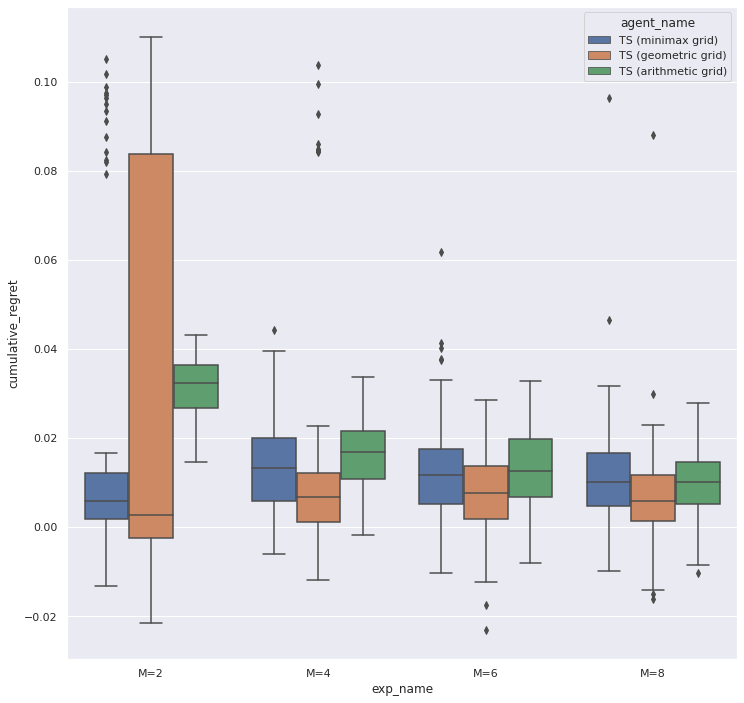

In [14]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [agent for agent in df.agent_name.unique() if "TS" in agent])
    ]
)


#### Eps-Greedy Agent


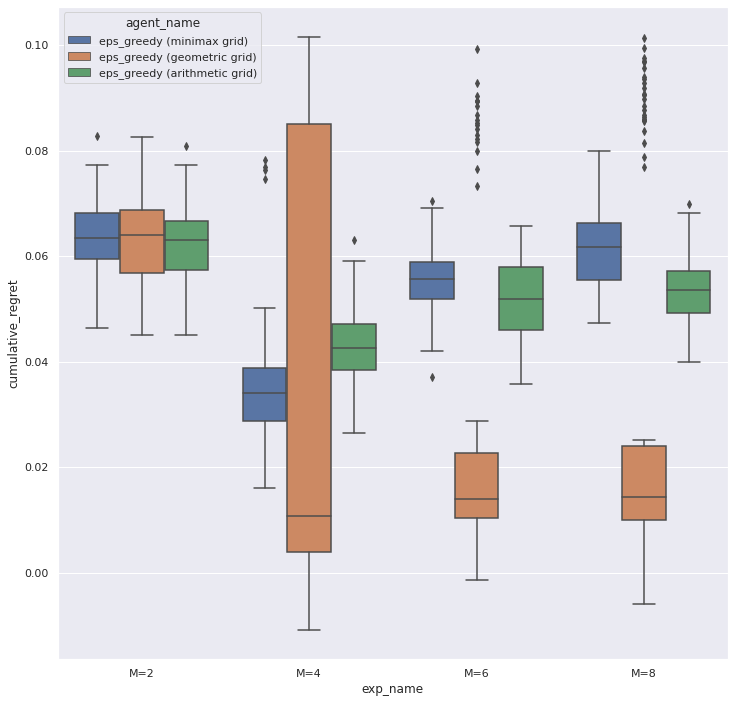

In [15]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [agent for agent in df.agent_name.unique() if "eps_greedy" in agent]
        )
    ]
)

#### AB Agent


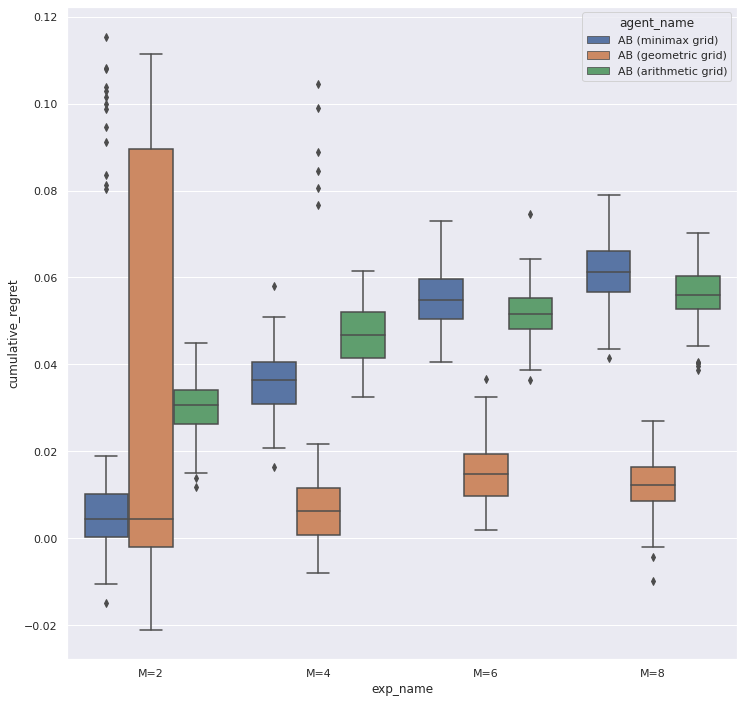

In [16]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [agent for agent in df.agent_name.unique() if "AB" in agent])
    ]
)


### BaSE Agent

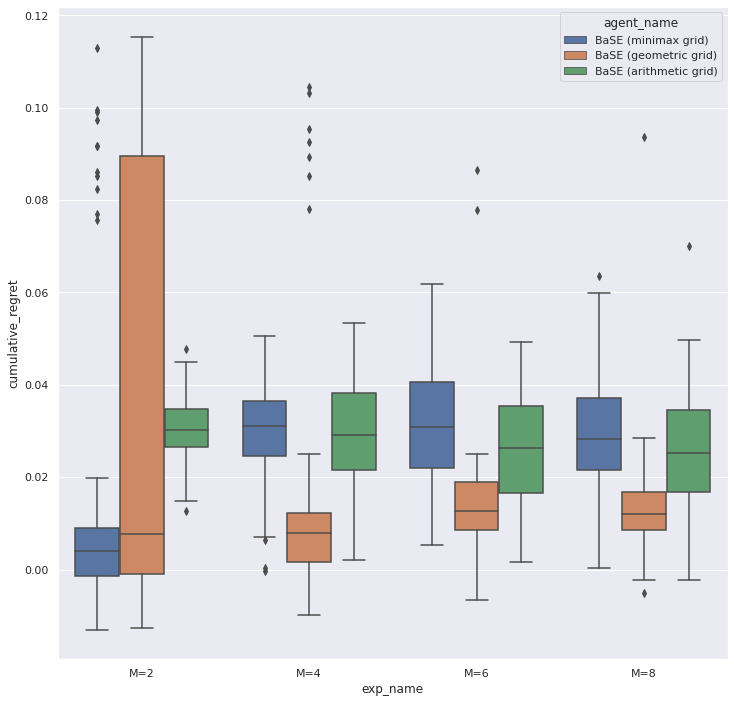

In [17]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [agent for agent in df.agent_name.unique() if "BaSE" in agent])
    ]
)


#### Comparison of Algorithms


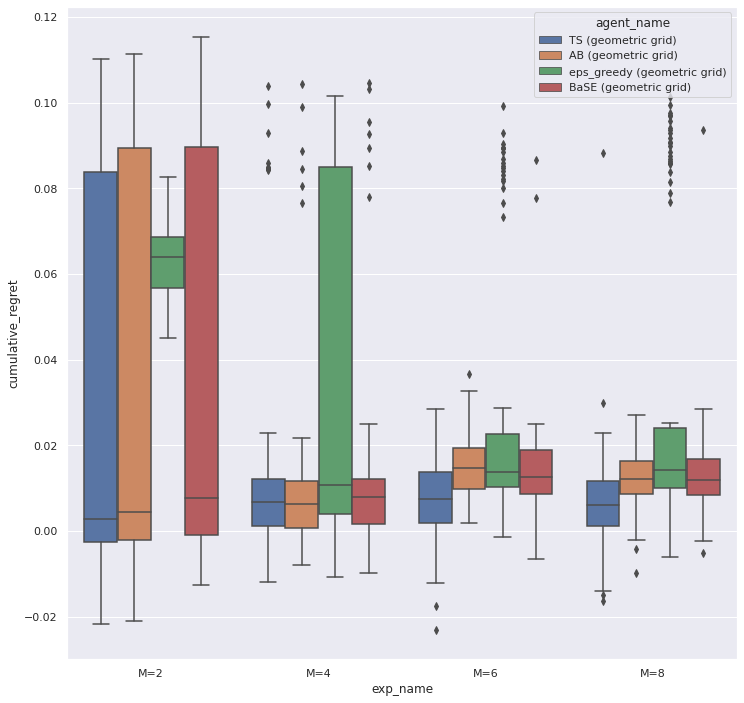

In [18]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [
                "AB (geometric grid)",
                "eps_greedy (geometric grid)",
                "TS (geometric grid)",
                "BaSE (geometric grid)",
            ]
        )
    ]
)


### Arm Number Experiment


In [19]:
df = pd.read_csv("arm_exp.csv").drop("Unnamed: 0", axis=1)

#### TS


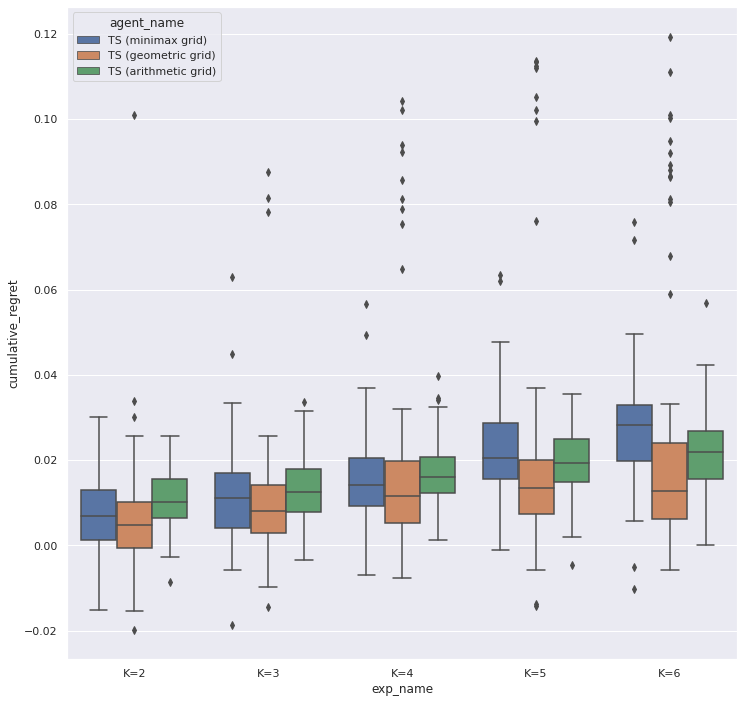

In [20]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [agent for agent in df.agent_name.unique() if "TS" in agent])
    ]
)


#### Epsilon Greedy


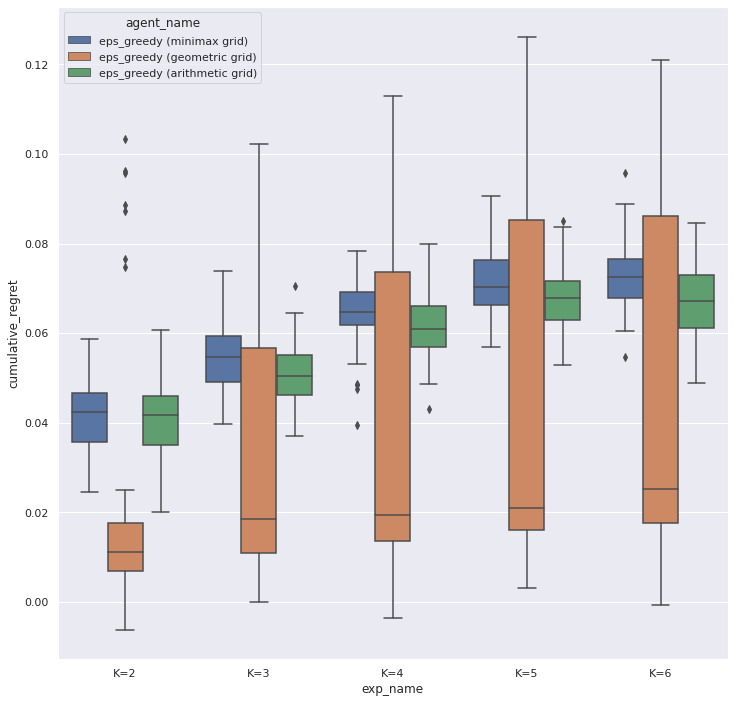

In [21]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [agent for agent in df.agent_name.unique() if "eps_greedy" in agent]
        )
    ]
)

#### AB Test


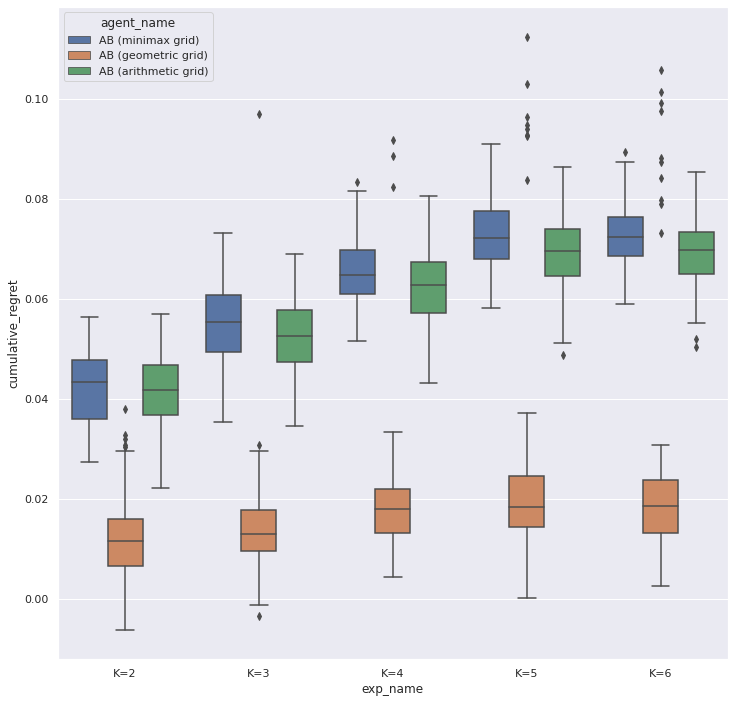

In [22]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [agent for agent in df.agent_name.unique() if "AB" in agent])
    ]
)


#### BaSE

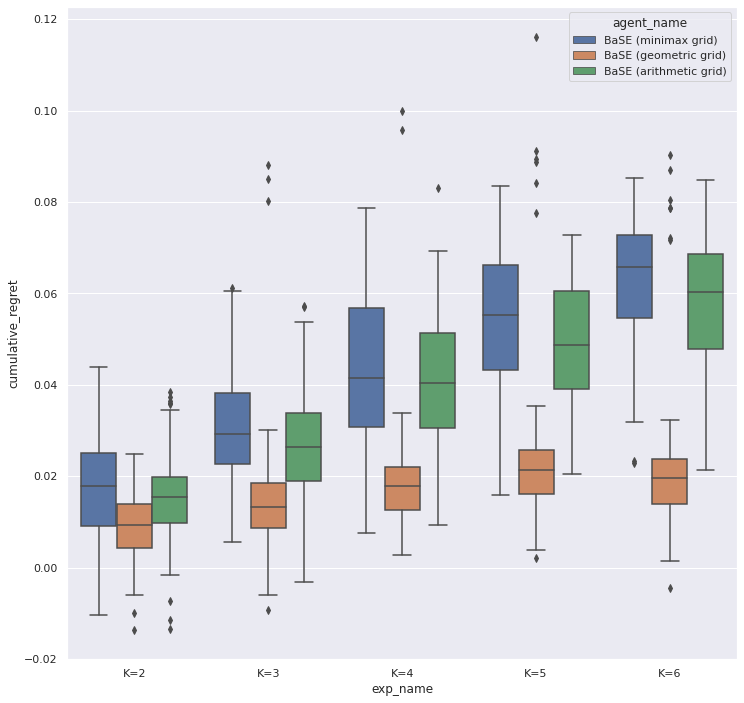

In [23]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [agent for agent in df.agent_name.unique() if "BaSE" in agent])
    ]
)


#### Algorithm Comparison


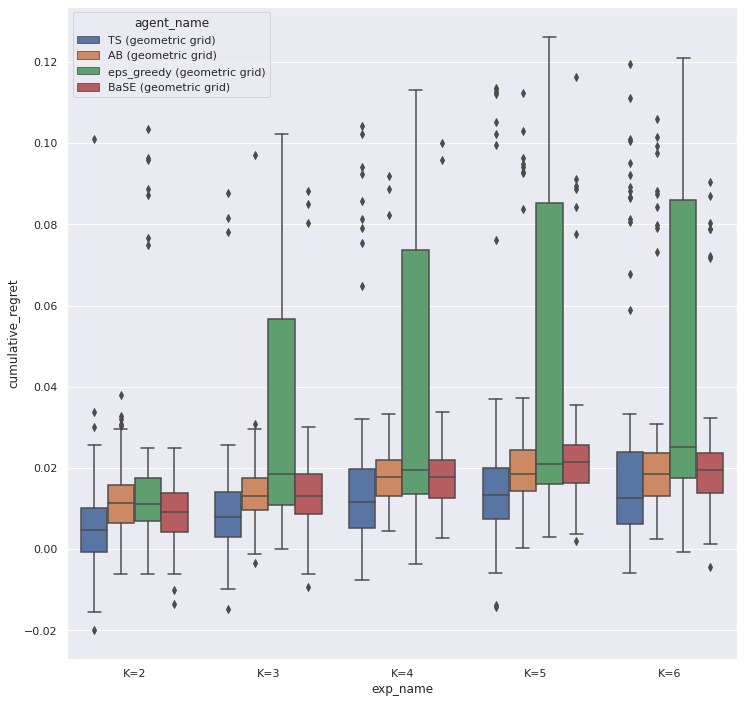

In [24]:
plot_regret(
    df=df[
        df.agent_name.isin(
            [
                "AB (geometric grid)",
                "eps_greedy (geometric grid)",
                "TS (geometric grid)",
                "BaSE (geometric grid)"
            ]
        )
    ]
)


####  Comparison of Grids

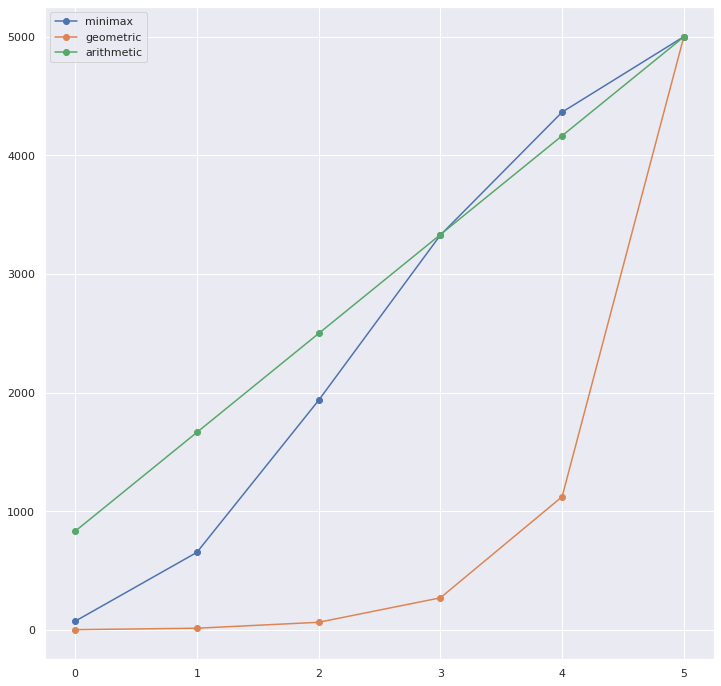

In [30]:
plt.plot(np.cumsum(make_minimax_grid(T, M)), marker='o', label='minimax')
plt.plot(np.cumsum(make_geometric_grid(T, M)), marker='o', label='geometric')
plt.plot(np.cumsum(make_arithmetic_grid(T, M)), marker='o', label='arithmetic')
plt.legend()